# EDA

# 데이터셋
- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압 (mm Hg)
- SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin : 2시간 혈청 인슐린 (mu U / ml)
- BMI : 체질량 지수 (체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

# 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드

In [2]:
df = pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum() # 결측치가 없음

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe() # 수치데이터에 대한 요약

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# outcome을 제외하고 저장
feature_columns = df.columns[:-1]
feature_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

# 결측치 시각화

In [7]:
cols = feature_columns[1:]
df[cols]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [8]:
# 0 값을 결측치라 가정
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [9]:
df_null.mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<AxesSubplot:>

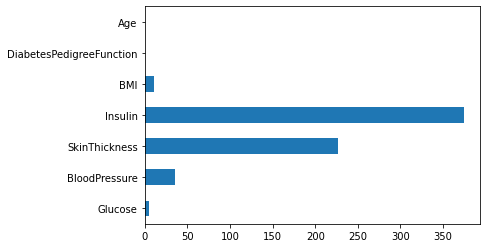

In [10]:
#결측치의 갯수 시각화
df_null.sum().plot.barh()

<AxesSubplot:>

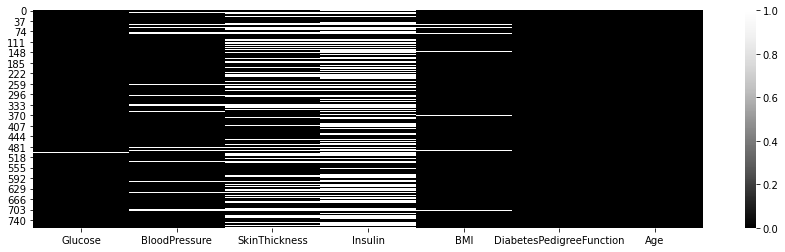

In [11]:
plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap='Greys_r')

# 정답값

In [12]:
# 정답값의 갯수
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
# outcome의 비율
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [17]:
# 임신횟수와 비교
df_po = df.groupby(['Pregnancies'])['Outcome'].agg(['mean', 'count']).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<AxesSubplot:>

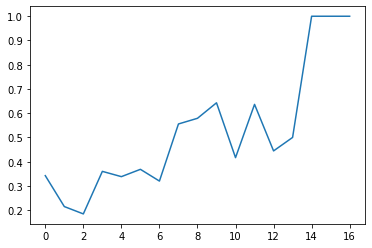

In [19]:
# 임신횟수에 따른 당뇨병 발병 비율
df_po['mean'].plot()

# countplot

<AxesSubplot:xlabel='Outcome', ylabel='count'>

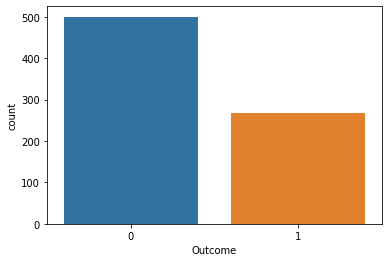

In [21]:
# 당뇨병 발병 비율
# 당뇨병 발병 빈도수 비교

sns.countplot(data=df, x='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

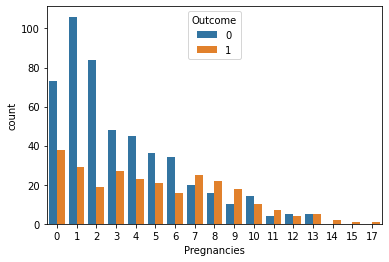

In [22]:
# 임신횟수에 따른 당뇨병 발병 빈도수 비교
sns.countplot(data=df, x='Pregnancies', hue='Outcome')

In [25]:
# 임신횟수의 많고 적음에 따라 Pregnancies_high변수 생성

df['Pregnancies_high'] = df['Pregnancies'] > 6 
df[['Pregnancies', 'Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<AxesSubplot:xlabel='Pregnancies_high', ylabel='count'>

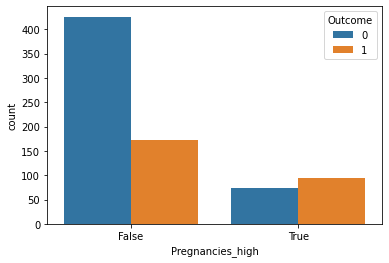

In [26]:
sns.countplot(data=df, x='Pregnancies_high', hue='Outcome')

# boxplot

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

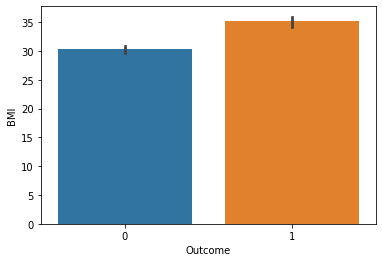

In [27]:
# 당뇨병 발병에 따른 BMI수치 비교
sns.barplot(data=df, x='Outcome', y='BMI')

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

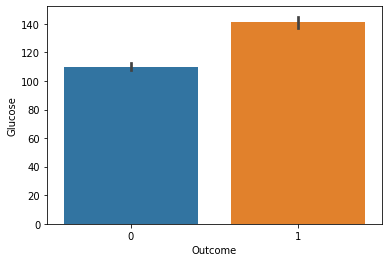

In [28]:
# 당뇨병 발병에 따른 포도당 수치
sns.barplot(data=df, x='Outcome', y='Glucose')

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

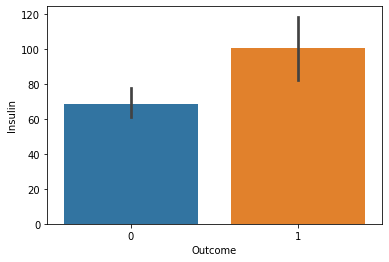

In [29]:
# 인슐린 수칙가 0 이상인 관측치에 대해 당뇨병 발병 비교
sns.barplot(data=df, x='Outcome', y='Insulin')

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

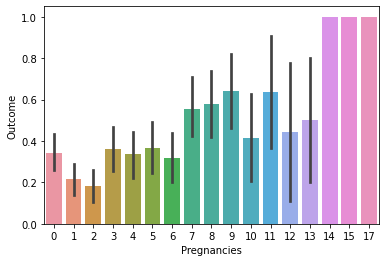

In [30]:
# 임신횟수에 대해서 당뇨병 발병 비율을 비교
sns.barplot(data=df, x='Pregnancies', y='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>

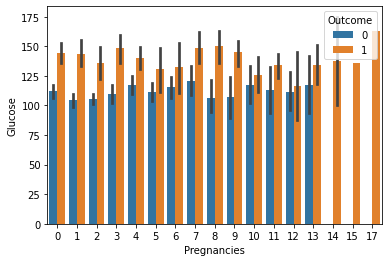

In [31]:
sns.barplot(data=df, x='Pregnancies', y='Glucose', hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='BMI'>

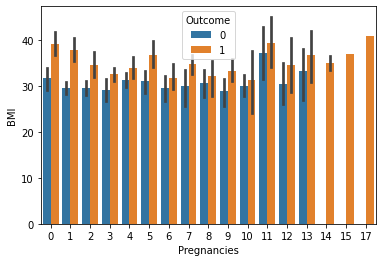

In [32]:
sns.barplot(data=df, x='Pregnancies', y='BMI', hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

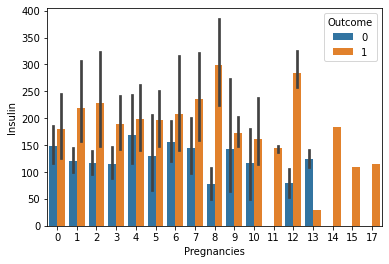

In [37]:
sns.barplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome')

# boxplot

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

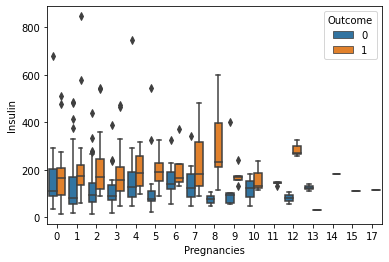

In [36]:
sns.boxplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome')

# violinplot

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

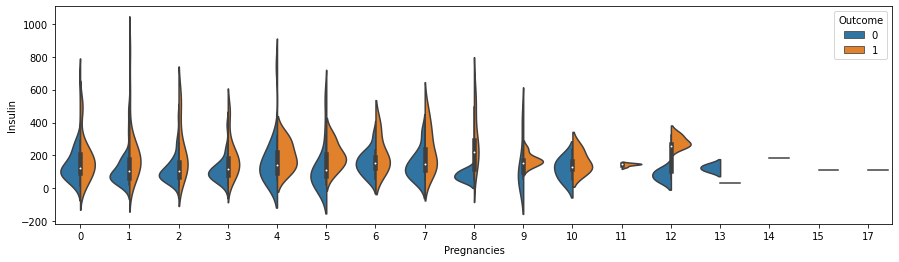

In [40]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome', split=True)

# swarmplot

/Users/kimyoungchan/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kimyoungchan/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

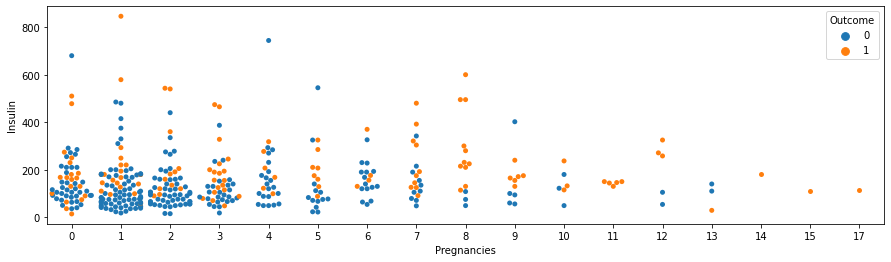

In [42]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome')

# distplot

In [44]:
df_0 = df[df['Outcome'] == 0]
df_1 = df[df['Outcome'] == 1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

/Users/kimyoungchan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kimyoungchan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

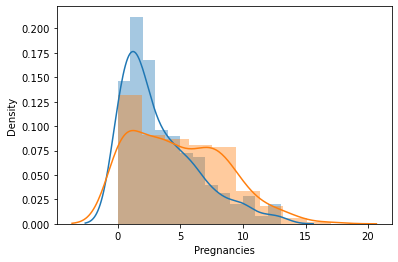

In [46]:
# 임신횟수에 따른 당뇨병 발병 여부 시각화

sns.distplot(df_0['Pregnancies'])
sns.distplot(df_1['Pregnancies'])

/Users/kimyoungchan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/kimyoungchan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/kimyoungchan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(m

<AxesSubplot:xlabel='Age', ylabel='Density'>

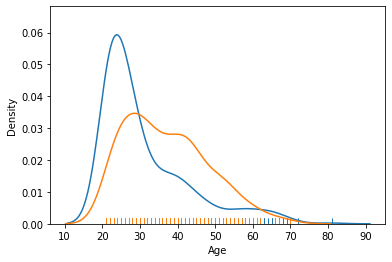

In [54]:
# 나이에 따른 당뇨병 발병 여부 시각화
sns.distplot(df_0['Age'], hist=False, rug=True, label=0)
sns.distplot(df_1['Age'], hist=False, rug=True, label=1)

# Subplots

## Pandas를 통한 histplot 그리기

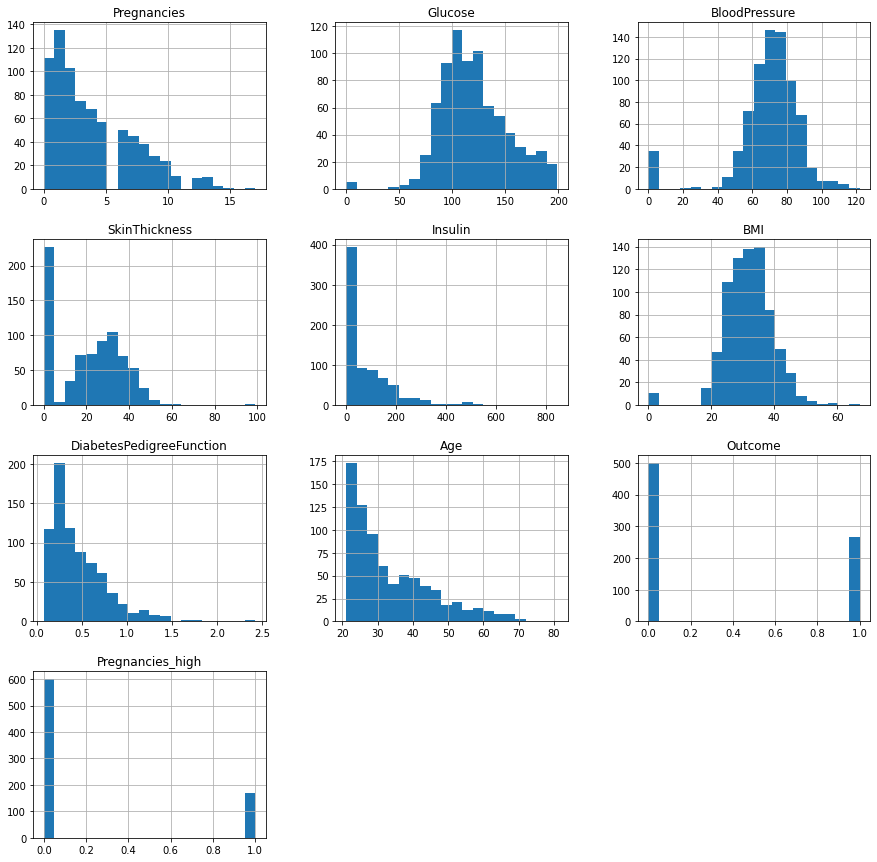

In [58]:
df['Pregnancies_high'] = df['Pregnancies_high'].astype(int)
h = df.hist(figsize=(15,15), bins=20)

## 반복문을 통한 서브플롯 그리기

### distplot

In [59]:
# 컬럼의 수 만큼 for문을 만들어서 서브플롯으로 시각화
col_num = df.columns.shape
col_num

(10,)

In [77]:
cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

0 Pregnancies 0 0
1 Glucose 0 1
2 BloodPressure 0 2
3 SkinThickness 1 0
4 Insulin 1 1
5 BMI 1 2
6 DiabetesPedigreeFunction 2 0
7 Age 2 1
8 Outcome 2 2


/Users/kimyoungchan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kimyoungchan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kimyoungchan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

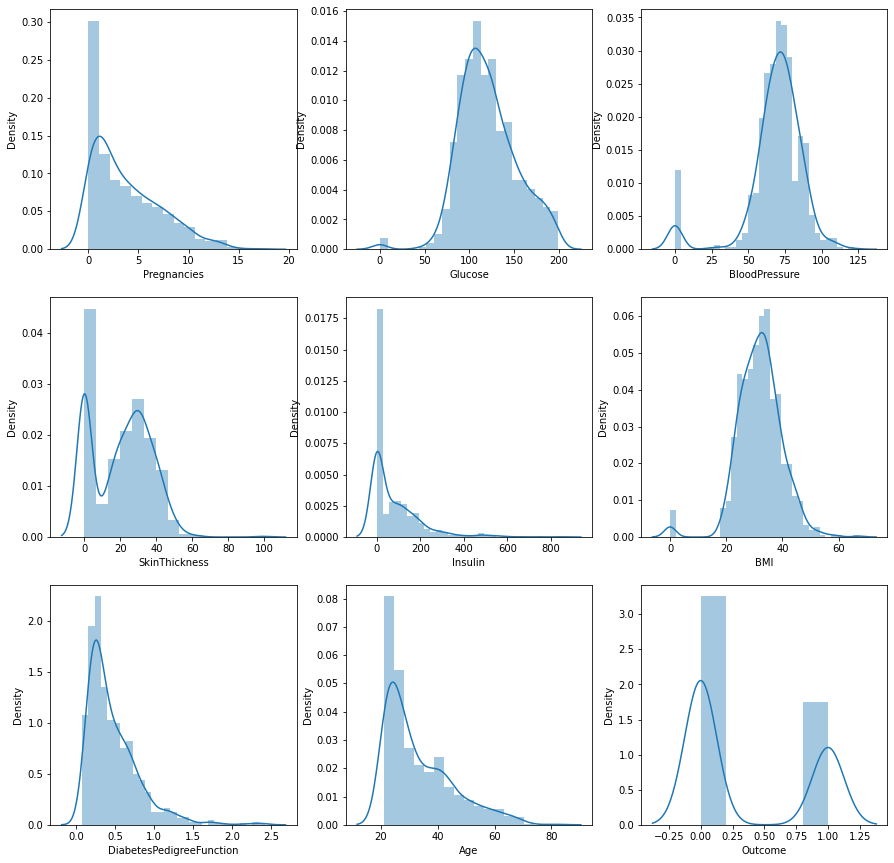

In [73]:
# distplot으로 서브플롯

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

for i, col_name in enumerate(cols):
    row = i // 3
    col = i % 3
    print(i, col_name, row, col)
    sns.distplot(df[col_name], ax=axes[row][col])

/Users/kimyoungchan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kimyoungchan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kimyoungchan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

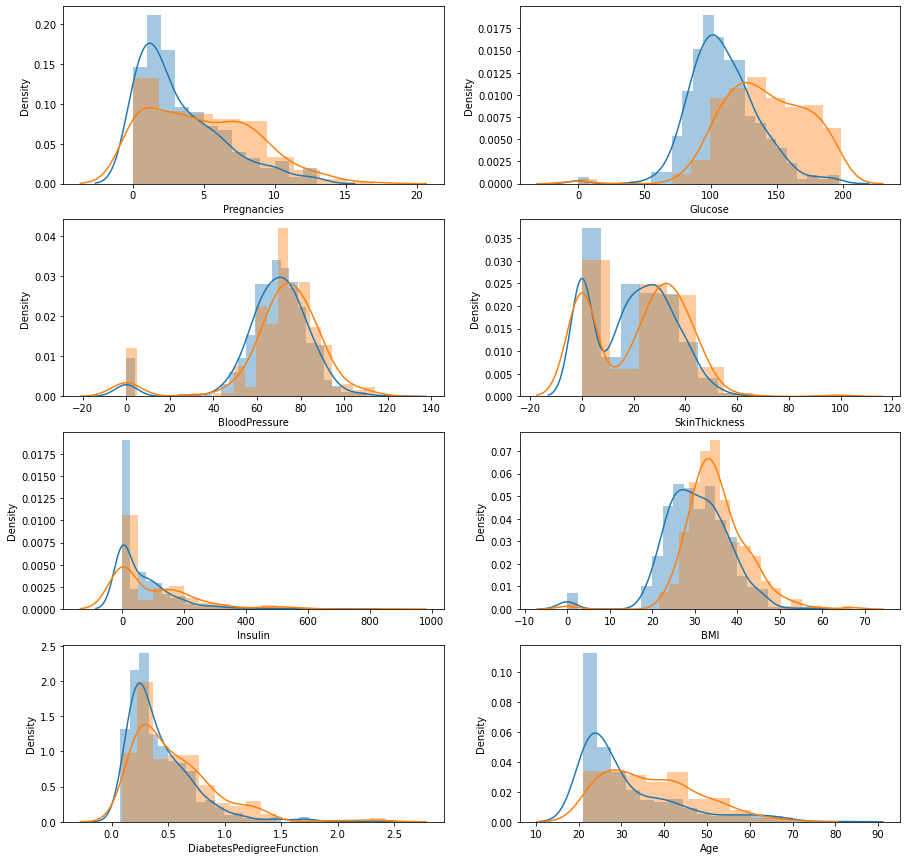

In [80]:
# 모든 변수에 대한 distplot

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])

### violinplot

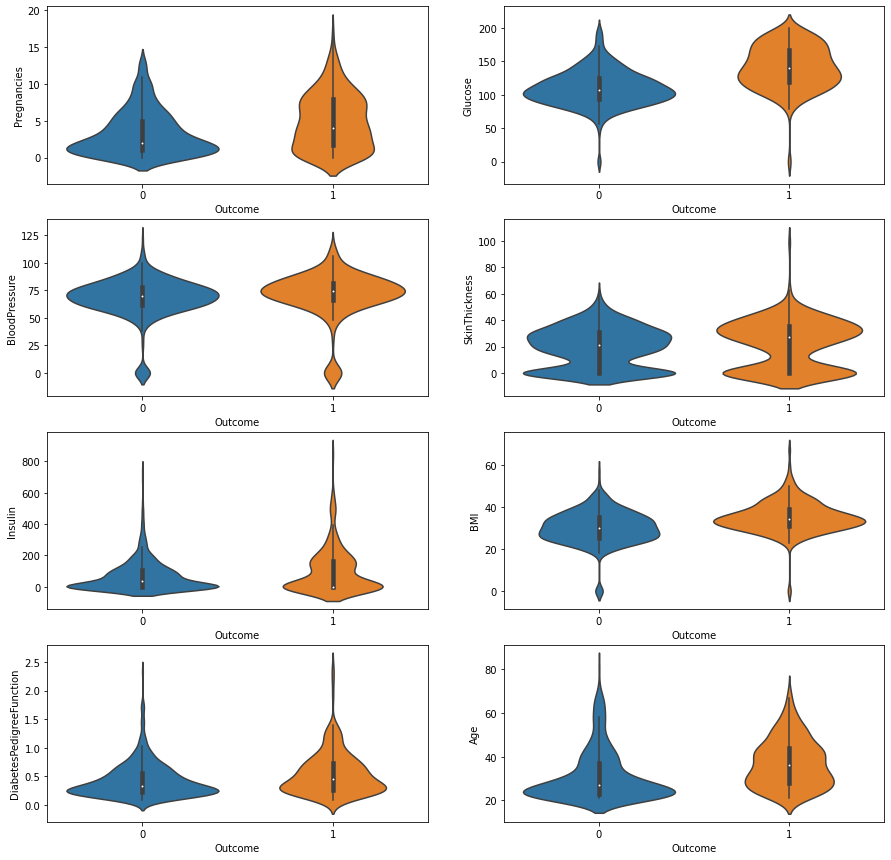

In [82]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.violinplot(data=df, x='Outcome', y=col_name, ax=axes[row][col])

### lmplot
- 상관계수가 높은 두 변수에 대해 시각화

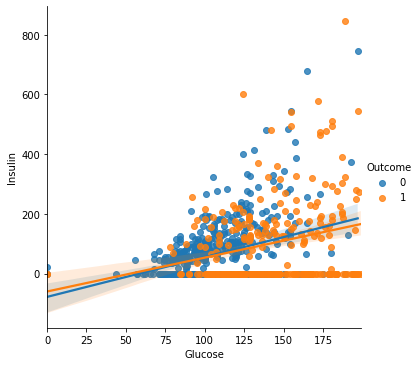

In [85]:
# 글루코스와 인슐린을 outcome으로 구분

sns.lmplot(data=df, x='Glucose', y='Insulin', hue='Outcome')

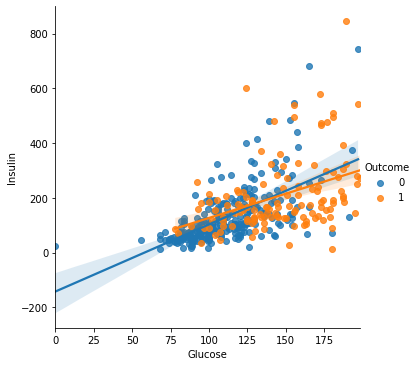

In [86]:
# 인슐린 수치가 0 이상인 데이터로만

sns.lmplot(data=df[df['Insulin']>0], x='Glucose', y='Insulin', hue='Outcome')

### pairplot

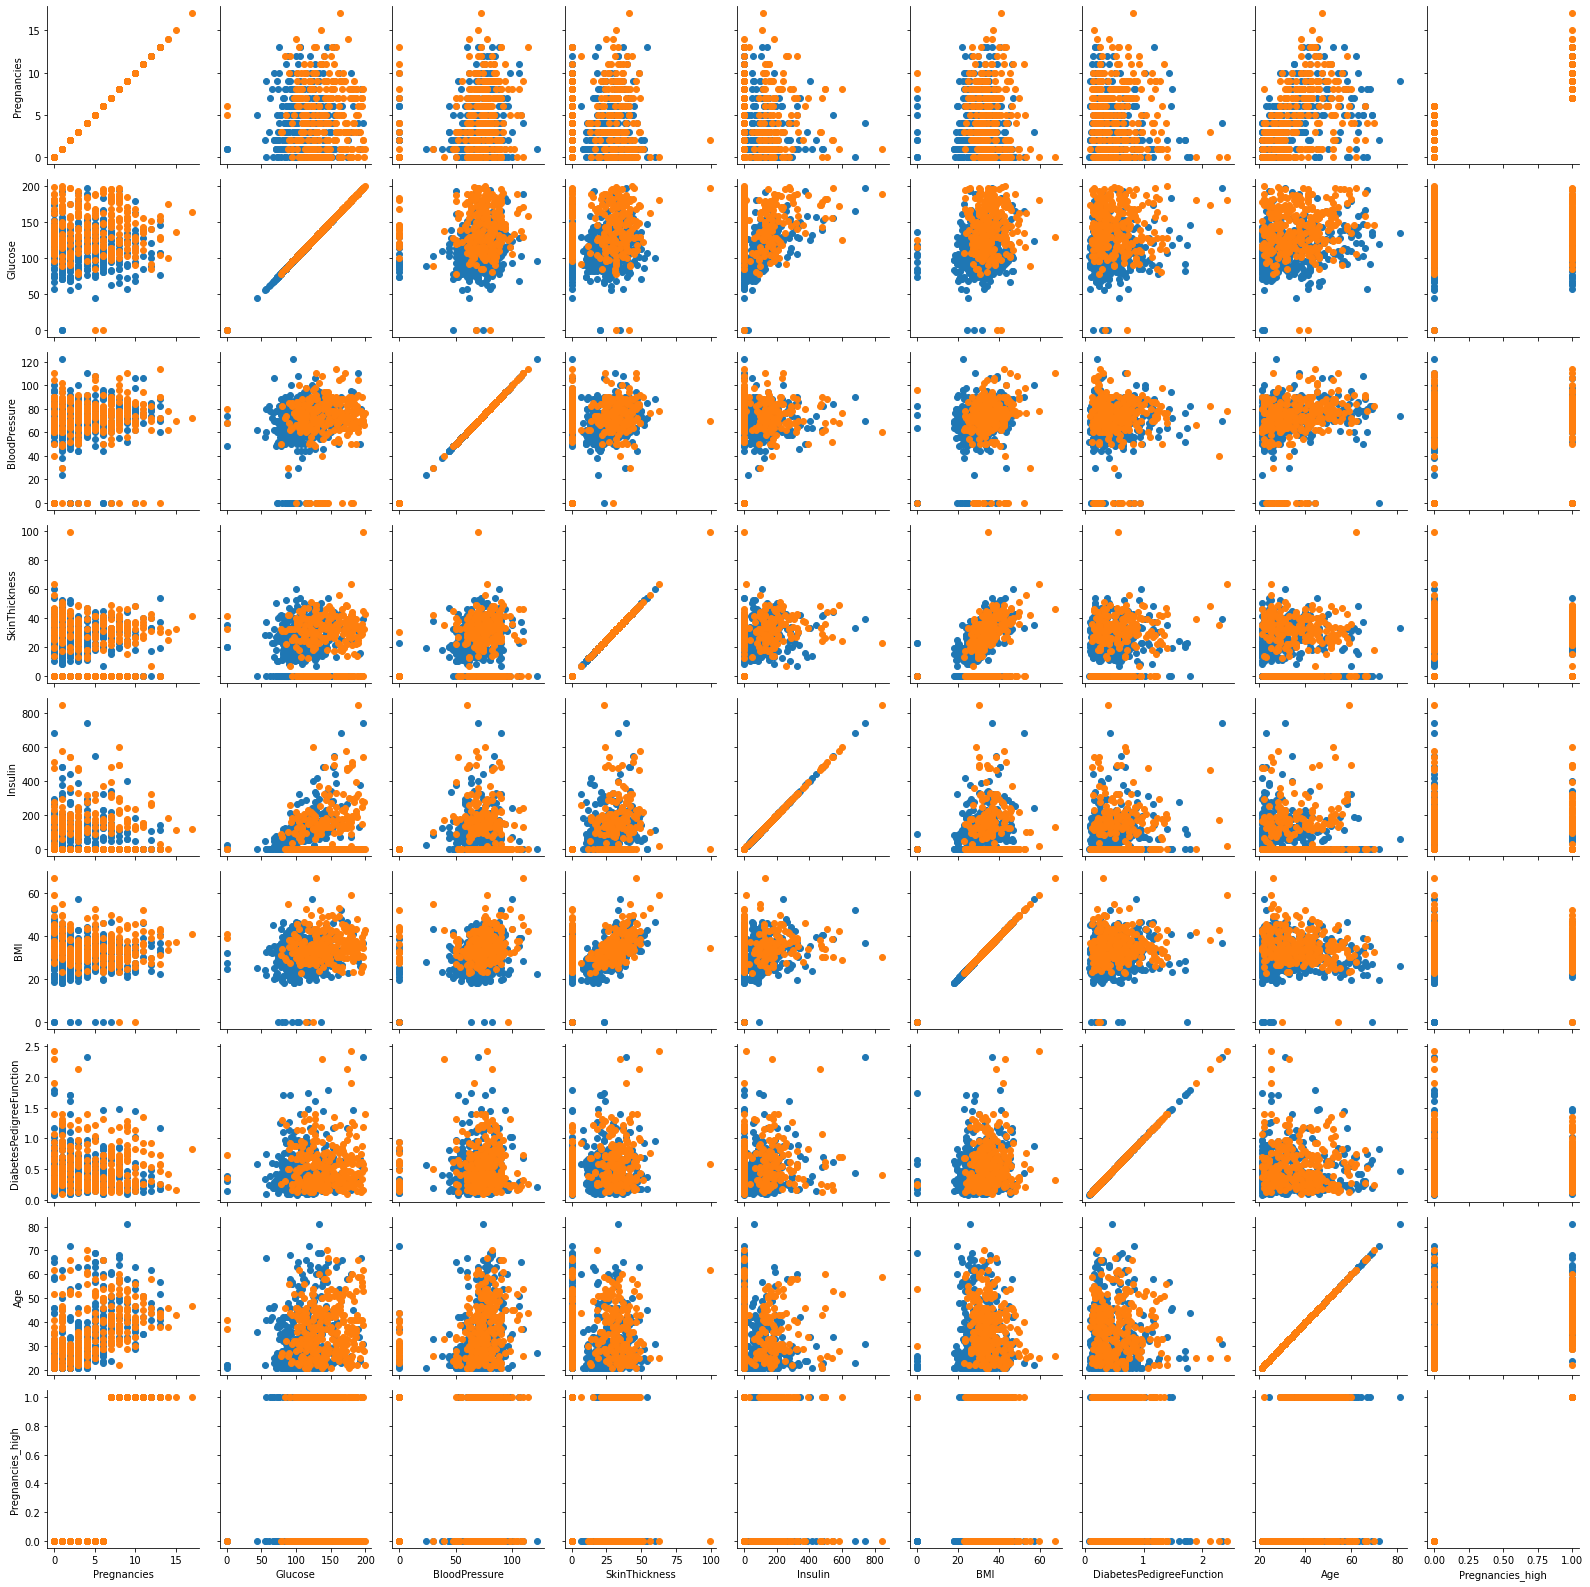

In [90]:
# PairGrid를 통해 모든 변수에 대해 결과에 따른 산점도
g = sns.PairGrid(df, hue='Outcome')
g.map(plt.scatter)

# 상관분석

In [104]:
df_matrix = df.iloc[:,:-2].replace(0, np.nan)
df_matrix['Outcome'] = df['Outcome']
df_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [105]:
# 정답값인 outcome을 제외하고 feature로 사용할 컬럼들에 대해 0을 결측치로 만듦

df_corr = df_matrix.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


<AxesSubplot:>

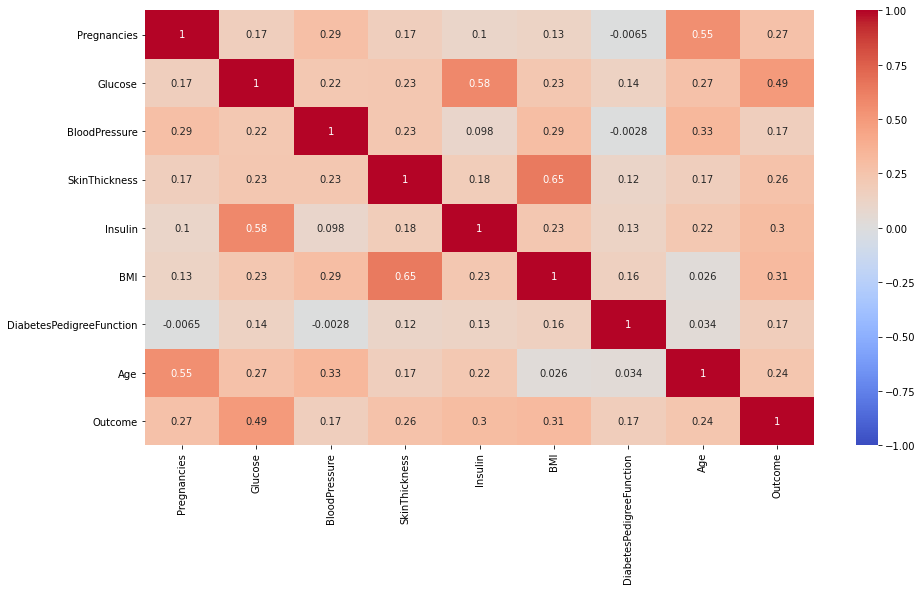

In [106]:
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, annot=True,vmax=1, vmin=-1, cmap='coolwarm')

In [107]:
df_corr['Outcome']

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

## 상관관계가 높은 변수끼리 보기

<AxesSubplot:xlabel='Insulin', ylabel='Glucose'>

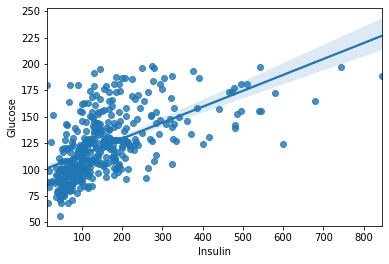

In [108]:
sns.regplot(data=df_matrix, x='Insulin', y='Glucose')

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

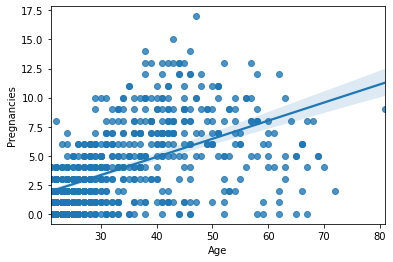

In [110]:
sns.regplot(data=df, x='Age', y='Pregnancies')

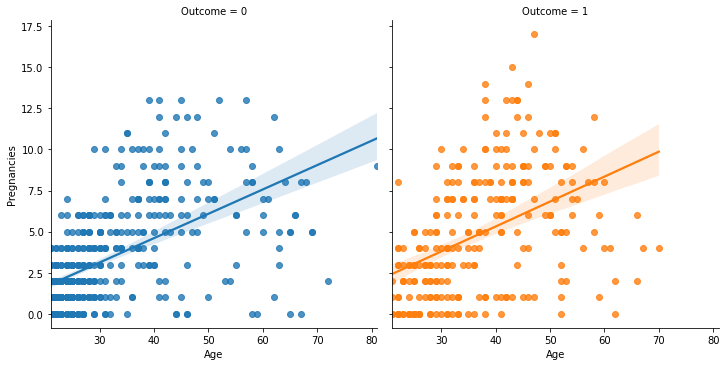

In [113]:
sns.lmplot(data=df, x='Age', y='Pregnancies', hue='Outcome', col='Outcome')